In [12]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号

In [13]:
f = pd.ExcelFile('D:/附件 建筑工地、道路与混凝土搅拌站设置的相关数据表.xls')
data = pd.read_excel(f, sheet_name=[0],index_col='工地的编号')
data

OrderedDict([(0,
                     工地的横坐标X  工地的纵坐标Y  混凝土需求量(方)                        Unnamed: 4
              工地的编号                                                               
              1        413.0    359.0      170.0                               说明：
              2        403.0    343.0      210.0                          A列：工地的编号
              3        383.5    351.0      220.0                        B列：工地的横坐标X
              4        381.0    377.5      170.0                       C列：各工地的纵坐标Y
              5        339.0    376.0      210.0                   D列：各工地每日的混凝土需求量
              6        335.0    383.0      250.0                               NaN
              7        317.0    362.0      240.0                               NaN
              8        334.5    353.5      240.0  地图距离和实际距离的比例是1:100000,即1毫米对应100米
              9        333.0    342.0      210.0                        坐标的长度单位为毫米
              10       282.0    325.0      160.0                      

In [14]:
data = data[0].loc[:,['工地的横坐标X', '工地的纵坐标Y' ]]
print(data)
data_zs = 1.0 * (data - data.mean()) / data.std()
data_zs

       工地的横坐标X  工地的纵坐标Y
工地的编号                  
1        413.0    359.0
2        403.0    343.0
3        383.5    351.0
4        381.0    377.5
5        339.0    376.0
6        335.0    383.0
7        317.0    362.0
8        334.5    353.5
9        333.0    342.0
10       282.0    325.0
11       247.0    301.0
12       219.0    316.0
13       225.0    270.0
14       280.0    292.0
15       290.0    335.0
16       337.0    328.0
17       415.0    335.0
18       432.0    371.0
19       418.0    374.0
20       444.0    394.0
21       251.0    277.0
22       234.0    271.0
23       225.0    265.0
24       212.0    290.0
25       227.0    300.0
26       256.0    301.0
27       250.5    306.0
28       243.0    328.0
29       246.0    337.0
30       314.0    367.0
...        ...      ...
63       391.0    375.0
64       392.0    366.0
65       395.0    361.0
66       398.0    362.0
67       401.0    359.0
68       405.0    360.0
69       410.0    355.0
70       408.0    350.0
71       415.0  

,工地的横坐标X,工地的纵坐标Y
工地的编号,,
1,0.784750,0.202401
2,0.630582,-0.334902
3,0.329954,-0.066250
4,0.291412,0.823658
5,-0.356095,0.773286
6,-0.417763,1.008356
7,-0.695266,0.303146
8,-0.425471,0.017703
9,-0.448596,-0.368484


In [16]:
from sklearn.cluster import KMeans

kme = KMeans(n_clusters=20, n_jobs=-1, max_iter=500)

kme.fit(data_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=20, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
r1 = pd.Series(kme.labels_).value_counts()

In [22]:
r1

2     9
3     8
13    8
12    8
10    7
9     6
4     6
8     5
1     4
16    4
11    4
7     4
5     3
0     3
18    3
17    3
6     2
14    2
15    2
19    1
dtype: int64

In [18]:
r2 = pd.DataFrame(kme.cluster_centers_)

In [23]:
r2

,0,1
0,1.257533,1.332977
1,-1.599078,-1.778905
2,0.631439,0.364712
3,-0.480394,-0.166995
4,-0.176232,0.633363
5,0.227175,-0.732283
6,-1.812986,-0.687507
7,-1.978717,-2.761163
8,0.766250,-0.486019
9,1.244686,0.994364


In [19]:
r = pd.concat([r2,r1], axis=1)

In [20]:
r.colums = list(data.columns) + [u'类别数目']

D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [21]:
r

,0,1,0
0,1.257533,1.332977,3
1,-1.599078,-1.778905,4
2,0.631439,0.364712,9
3,-0.480394,-0.166995,8
4,-0.176232,0.633363,6
5,0.227175,-0.732283,3
6,-1.812986,-0.687507,2
7,-1.978717,-2.761163,4
8,0.766250,-0.486019,5
9,1.244686,0.994364,6


In [25]:
r2[0]

0     1.257533
1    -1.599078
2     0.631439
3    -0.480394
4    -0.176232
5     0.227175
6    -1.812986
7    -1.978717
8     0.766250
9     1.244686
10    0.814483
11   -0.683703
12   -0.179765
13    1.063217
14   -2.198407
15   -1.173188
16   -0.417763
17    0.319676
18    0.342801
19   -2.206116
Name: 0, dtype: float64

In [38]:
print(data_zs['工地的横坐标X'])

工地的编号
1     0.784750
2     0.630582
3     0.329954
4     0.291412
5    -0.356095
6    -0.417763
7    -0.695266
8    -0.425471
9    -0.448596
10   -1.234855
11   -1.774444
12   -2.206116
13   -2.113615
14   -1.265689
15   -1.111520
16   -0.386929
17    0.815584
18    1.077670
19    0.861835
20    1.262672
21   -1.712777
22   -1.974863
23   -2.113615
24   -2.314034
25   -2.082781
26   -1.635693
27   -1.720485
28   -1.836112
29   -1.789861
30   -0.741516
        ...   
63    0.445580
64    0.460997
65    0.507247
66    0.553498
67    0.599748
68    0.661416
69    0.738500
70    0.707666
71    0.815584
72    0.861835
73    0.923502
74    0.869543
75    0.669124
76    0.661416
77    0.723083
78    0.846418
79    0.892668
80    0.954336
81    1.170171
82    1.177880
83    1.108504
84    1.170171
85    1.201005
86    1.308923
87    1.324340
88    1.270381
89    1.216422
90    1.208713
91    1.278089
92    1.262672
Name: 工地的横坐标X, Length: 92, dtype: float64


In [37]:
data_zs[(data_zs.工地的横坐标X==1.257533) & (data_zs.工地的纵坐标Y==1.332977)].index.tolist()

[]

In [42]:
data.std() + data.mean()

工地的横坐标X    426.961980
工地的纵坐标Y    382.751161
dtype: float64

In [44]:
r3 = kme.labels_

In [46]:
r3.shape

(92,)

In [52]:
data_zs

,工地的横坐标X,工地的纵坐标Y
工地的编号,,
1,0.784750,0.202401
2,0.630582,-0.334902
3,0.329954,-0.066250
4,0.291412,0.823658
5,-0.356095,0.773286
6,-0.417763,1.008356
7,-0.695266,0.303146
8,-0.425471,0.017703
9,-0.448596,-0.368484


In [61]:
r3 = Series(r3,index=data_zs.index)

In [65]:
r3

工地的编号
1      8.0
2     17.0
3     18.0
4      4.0
5     12.0
6     11.0
7      3.0
8      3.0
9     15.0
10     1.0
11    19.0
12     7.0
13     1.0
14    15.0
15    16.0
16     8.0
17    13.0
18    13.0
19     0.0
20     7.0
21     7.0
22     7.0
23    14.0
24    14.0
25     1.0
26     1.0
27     6.0
28     6.0
29    11.0
30     3.0
      ... 
63     2.0
64     2.0
65     2.0
66     2.0
67     2.0
68    10.0
69    10.0
70    10.0
71    10.0
72    10.0
73    10.0
74     2.0
75     2.0
76     2.0
77     2.0
78    13.0
79    13.0
80    13.0
81    13.0
82    13.0
83     9.0
84     0.0
85     0.0
86     9.0
87     9.0
88     9.0
89     9.0
90     9.0
91    13.0
92     NaN
Length: 92, dtype: float64

In [63]:
data_zs['所属类别'] = r3

In [64]:
data_zs

,工地的横坐标X,工地的纵坐标Y,所属类别
工地的编号,,,
1,0.784750,0.202401,8.0
2,0.630582,-0.334902,17.0
3,0.329954,-0.066250,18.0
4,0.291412,0.823658,4.0
5,-0.356095,0.773286,12.0
6,-0.417763,1.008356,11.0
7,-0.695266,0.303146,3.0
8,-0.425471,0.017703,3.0
9,-0.448596,-0.368484,15.0


In [68]:
x = Series(kme.labels_)

In [70]:
x.index = data_zs.index

In [71]:
x

工地的编号
1     10
2      8
3     17
4     18
5      4
6     12
7     11
8      3
9      3
10    15
11     1
12    19
13     7
14     1
15    15
16    16
17     8
18    13
19    13
20     0
21     7
22     7
23     7
24    14
25    14
26     1
27     1
28     6
29     6
30    11
      ..
63    18
64     2
65     2
66     2
67     2
68     2
69    10
70    10
71    10
72    10
73    10
74    10
75     2
76     2
77     2
78     2
79    13
80    13
81    13
82    13
83    13
84     9
85     0
86     0
87     9
88     9
89     9
90     9
91     9
92    13
Length: 92, dtype: int32

In [74]:
data['所属类别'] = x

In [75]:
data

,工地的横坐标X,工地的纵坐标Y,所属类别
工地的编号,,,
1,413.0,359.0,10
2,403.0,343.0,8
3,383.5,351.0,17
4,381.0,377.5,18
5,339.0,376.0,4
6,335.0,383.0,12
7,317.0,362.0,11
8,334.5,353.5,3
9,333.0,342.0,3


In [77]:
g = list(data.groupby(data['所属类别']))

In [78]:
g

[(0,        工地的横坐标X  工地的纵坐标Y  所属类别
  工地的编号                        
  20       444.0    394.0     0
  85       440.0    392.0     0
  86       447.0    392.0     0), (1,        工地的横坐标X  工地的纵坐标Y  所属类别
  工地的编号                        
  11       247.0    301.0     1
  14       280.0    292.0     1
  26       256.0    301.0     1
  27       250.5    306.0     1), (2,        工地的横坐标X  工地的纵坐标Y  所属类别
  工地的编号                        
  64       392.0    366.0     2
  65       395.0    361.0     2
  66       398.0    362.0     2
  67       401.0    359.0     2
  68       405.0    360.0     2
  75       405.5    364.5     2
  76       405.0    368.0     2
  77       409.0    370.0     2
  78       417.0    364.0     2), (3,        工地的横坐标X  工地的纵坐标Y  所属类别
  工地的编号                        
  8        334.5    353.5     3
  9        333.0    342.0     3
  31       315.0    351.0     3
  32       326.0    355.0     3
  33       327.0    350.0     3
  34       328.0    342.5     3
  45       342.0    342.0

In [83]:
zhongdian = []
data_zs[(data_zs.工地的横坐标X==1.257533) & (data_zs.工地的纵坐标Y==1.332977)].index.tolist()
for x in r2.values:
    print(x)
    print(data_zs[(data_zs.工地的横坐标X==x[0]) & (data_zs.工地的纵坐标Y==x[1])].index.tolist())

[1.25753341 1.33297715]
[]
[-1.59907776 -1.77890488]
[]
[0.63143858 0.3647117 ]
[]
[-0.48039363 -0.16699476]
[]
[-0.17623231  0.63336338]
[]
[ 0.22717489 -0.73228269]
[]
[-1.81298636 -0.68750741]
[]
[-1.97871734 -2.76116261]
[]
[ 0.76625025 -0.48601864]
[]
[1.24468605 0.99436409]
[]
[0.81448292 0.00570989]
[]
[-0.68370315  0.52982055]
[]
[-0.17976533  1.07551929]
[]
[1.06321704 0.5885881 ]
[]
[-2.19840725 -1.94681219]
[]
[-1.17318768 -0.77146106]
[]
[-0.41776273 -0.63713522]
[]
[ 0.31967591 -0.09983184]
[]
[0.34280116 0.83485215]
[]
[-2.20611567 -1.24160151]
[12]


6.365459338773453


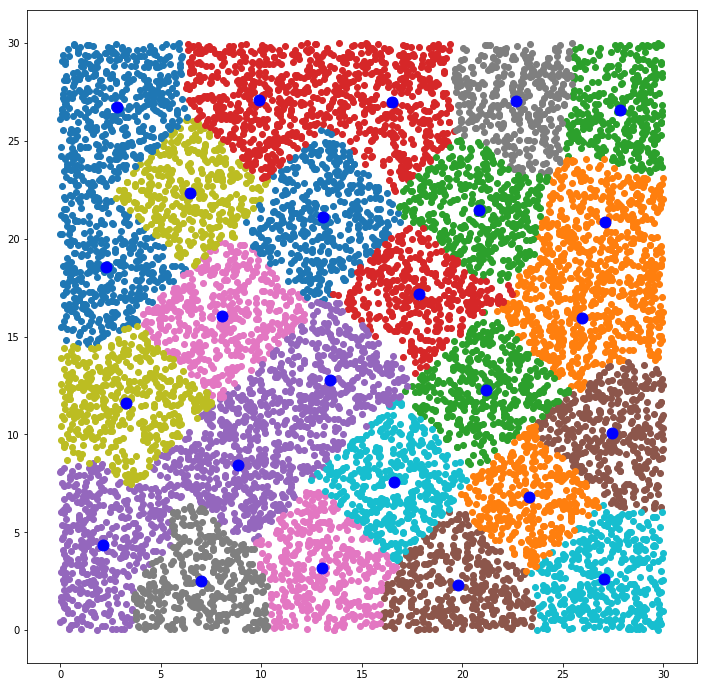

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
def kmeans(data,k=2):
    def _euclidDistance(p1,p2): 
        return np.sqrt(np.sum((p1-p2)**2))
    def _manhattanDistance(p1,p2): 
        return np.sum(np.abs(p1-p2))
    def _randCenter(data,k): 
        n = data.shape[1] # features 
        centroids = np.zeros((k,n)) # init with (0,0).... 
        for i in range(n): 
            dmin, dmax = np.min(data[:,i]), np.max(data[:,i]) 
            centroids[:,i] = dmin + (dmax - dmin) * np.random.rand(k) 
            return centroids
    def _converged(centroids1, centroids2): 
        set1 = set([tuple(c) for c in centroids1]) 
        set2 = set([tuple(c) for c in centroids2]) 
        return (set1 == set2)
    n = data.shape[0] # number of entries 
    centroids = _randCenter(data,k) 
    label = np.zeros(n,dtype=np.int) # track the nearest centroid 
    assement = np.zeros(n) # for the assement of our model 
    converged = False
    while not converged:
        old_centroids = np.copy(centroids) 
        for i in range(n): # determine the nearest centroid and track it with label 
            min_dist, min_index = np.inf, -1 
            for j in range(k): 
                dist = _manhattanDistance(data[i],centroids[j]) 
                if dist < min_dist: 
                    min_dist, min_index = dist, j 
                    label[i] = j 
                    assement[i] = _manhattanDistance(data[i],centroids[label[i]])
            assement[i] = _manhattanDistance(data[i],centroids[label[i]])

        # update centroid 
        for m in range(k): 
            if data[label==m].size!=0: 
                centroids[m] = np.mean(data[label==m],axis=0)           
        converged = _converged(old_centroids,centroids)
    return centroids, label, np.max(assement)
data = np.random.uniform(0,30,(10000,2)) 
best_assement = np.inf 
best_centroids = None 
best_label = None
max_r=15 
k=25
for i in range(10): 
    centroids, label, assement = kmeans(data,k) 
    if assement < best_assement: 
        best_assement = assement 
        best_centroids = centroids 
        best_label = label
print (best_assement)
data0 = data[best_label==0] 
data1 = data[best_label==1] 
data2 = data[best_label==2] 
fig, ax2 = plt.subplots(figsize=(12,12)) 
for i in range(k): 
    ax2.scatter(data[best_label==i][:,0],data[best_label==i][:,1]) 
ax2.scatter(best_centroids[:,0],best_centroids[:,1], c='b',s=120,marker='o') 
plt.show()

In [8]:
np.random.uniform(0,30,(10000,2))[1]

array([26.2524347 , 13.87968227])